In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [3]:
# set the initial weights
np.random.seed(9)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [4]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [5]:
print(W1)
print()
print(b1)

[[ 1.10855471e-03 -2.89544069e-01 -1.11606630e+00 -1.28827567e-02]
 [-3.78361464e-01 -4.81135363e-01 -1.51733118e+00 -4.90871981e-01]]

[-0.24068058 -0.64794746  0.63589108  1.74011731]


In [6]:
print(W2)
print()
print(b2)

[[ 0.29668222  0.70750366  1.82281576]
 [ 0.43076903  1.54272963 -0.90072117]
 [-0.13712501  1.29757901  0.67527117]
 [ 0.03195812  0.9181459   0.38050947]]

[ 0.51636749 -0.35523946  0.208777  ]


In [7]:
# Create three clusters
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

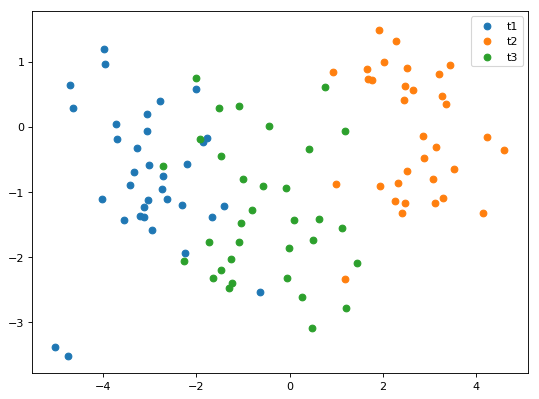

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [11]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [12]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [13]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [14]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [15]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [16]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [17]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [18]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [19]:
def cost(t, y):
    return -t*np.log(y)

In [20]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [21]:
def error(cost):
    return (cost.sum())/N

In [22]:
err0 = error(cost1)
err0

1.6850577128658057

In [23]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [24]:
acc0 = accuracy(ohe(t), y2)
acc0

0.4666666666666667

In [25]:
err_reg = []
acc_reg = []

In [26]:
lr = 0.001
cache_W1 = 0
cache_b1 = 0
cache_W2 = 0
cache_b2 = 0
decay = 0.99
eps = 10e-8

print('initial error: {}'.format(err0))

initial error: 1.6850577128658057


In [27]:
for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    cache_W2 = decay*cache_W2 + (1-decay)*dw2*dw2
    cache_b2 = decay*cache_b2 + (1-decay)*db2*db2
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    cache_W1 = decay*cache_W1 + (1-decay)*dw1*dw1
    cache_b1 = decay*cache_b1 + (1-decay)*db1*db1
    
    W2 += (lr*dw2)/(np.sqrt(cache_W2 + eps))
    b2 += (lr*db2)/(np.sqrt(cache_b2 + eps))
    W1 += (lr*dw1)/(np.sqrt(cache_W1 + eps))
    b1 += (lr*db1) /(np.sqrt(cache_b1 + eps))   
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

error:1.6850577128658057
error:1.2468781562693807
error:1.144743454870543
error:1.0605799474253024
error:0.9651318418612592
error:0.8652413931025711
error:0.7756855198959349
error:0.702179928277025
error:0.6418250170872706
error:0.5911152170950906
error:0.5475429638949655
error:0.508836423815633
error:0.47399841611942944
error:0.44289609176642514
error:0.41529691819305
error:0.3909371976249078
error:0.36949908889250255
error:0.35078060571789393
error:0.334579729942524
error:0.32052732206110224
error:0.3081095284497964
error:0.29695399474449913
error:0.28700967791656634
error:0.2782825661482725
error:0.2706803045602086
error:0.2640523638560908
error:0.2582374433224672
error:0.25314417761426156
error:0.24870505188390232
error:0.24484572974211474
error:0.2414864805983475
error:0.23855871330680484
error:0.23601313701803706
error:0.23380512751344193
error:0.23187956184808164
error:0.23016818339347217
error:0.2286054041967754
error:0.22715654731881393
error:0.2258013923872344
error:0.2245143

In [28]:
accuracy(ohe(t), y2)

0.9466666666666667

## Graph

### Constant learning rate

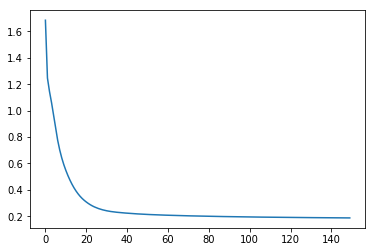

In [29]:
plt.plot(err_reg)
plt.show()

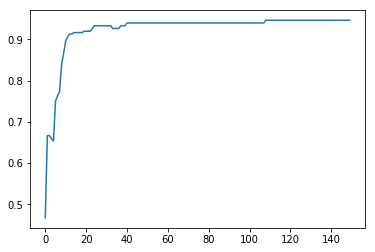

In [30]:
plt.plot(acc_reg)
plt.show()

## Decision Boundary

In [31]:
def predict_all(X):
    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    return np.argmax(y2, axis=1)

In [32]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6), dpi=80)
    plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.18)
    plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.brg)
    plt.title('MLP with RMSprop Decision Boundary')
    plt.savefig('./data/MLP_RMS.png')
    plt.show()

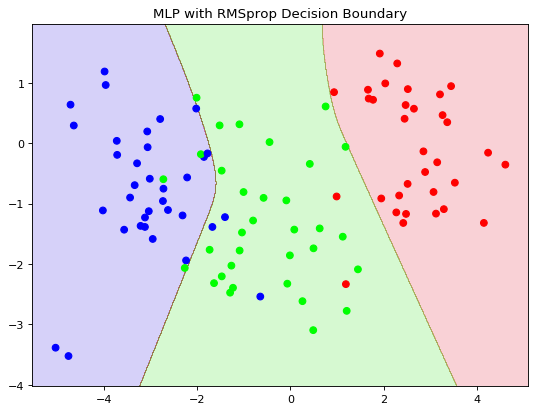

In [33]:
plot_decision_boundary(lambda x: predict_all(x))